In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read data

In [2]:
dataset_path = "data/titanic_modified_dataset.csv"
df = pd.read_csv(dataset_path,index_col="PassengerId")
df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [3]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:,:-1],dataset_arr[:,-1]

In [4]:
# add bias
intercept = np.ones((X.shape[0],1))
X_b = np.concatenate((intercept,X),axis = 1)

In [5]:
# split data
val_size = 0.3
test_size = 0.1
random_state = 2
shuffle = True
X_train,X_val,y_train,y_val = train_test_split(X_b,y,test_size=val_size,shuffle=shuffle,random_state=random_state)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size=test_size,shuffle=shuffle,random_state=random_state)

In [6]:
# nomalize data
nomalizer = StandardScaler()
X_train[:,1:] = nomalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = nomalizer.transform(X_val[:,1:])
X_test[:,1:] = nomalizer.transform(X_test[:,1:])

# Model

In [7]:
class LogisticRegression():
    def __init__(self,lr= 0.01,epochs = 100,batch_size = 128,threshold = 0.5):
        self.W = None
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.threshold = threshold
        pass
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def predict(self,X):
        y_hat = self.sigmoid(X.dot(self.W))
        return y_hat
    def gradient(self,x,y_hat,y):
        return (x.T.dot(y_hat - y))/y_hat.shape[0]
        
    def update_weight(self,x,y_hat,y):
        self.W = self.W - self.gradient(x,y_hat,y)*self.lr
    def compute_loss(self,y_hat,y):
       
        y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7 )
        
        loss = -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
        return np.mean(loss)
    def compute_accracy(self,y_hat,y):
        
        predicted_label = (y_hat > self.threshold).astype(int)
        return (predicted_label == y).sum()/y.shape[0]
    
    def train(self,X_train,Y_train,X_val,Y_val):
        np.random.seed(random_state) 
        self.W = np.random.uniform(
                        size=X_train.shape[1] )
        train_accs = [] 
        train_losses = []
        val_accs = [] 
        val_losses = []
        for epoch in range(self.epochs):
            train_batch_losses = [] 
            train_batch_accs = [] 
            val_batch_losses = [] 
            val_batch_accs = []
            for batch in range(0,X_train.shape[0] - self.batch_size +1,self.batch_size):
                x_train = X_train[self.batch_size:self.batch_size+self.batch_size]
                y_train = Y_train[self.batch_size:self.batch_size+self.batch_size]
                
                y_hat_train = self.predict(x_train)
                
                self.update_weight(x_train,y_hat_train,y_train)
               
                train_batch_losses.append(self.compute_loss(y_hat_train,y_train))
                
              
            for batch in range(0,X_val.shape[0] - self.batch_size +1,self.batch_size):
               
                x_val = X_val[self.batch_size:self.batch_size+self.batch_size]
                y_val = Y_val[self.batch_size:self.batch_size+self.batch_size]
                
               
                y_hat_val = self.predict(x_val)
              
                val_batch_losses.append(self.compute_loss(y_hat_val,y_val))
            
        
            
            train_batch_loss = sum(train_batch_losses) / len(train_batch_losses) 
            val_batch_loss = sum(val_batch_losses) / len(val_batch_losses) 
            train_losses.append(train_batch_loss) 
            val_losses.append(val_batch_loss) 
            train_accs.append(self.compute_accracy(self.predict(X_train),Y_train)) 
            val_accs.append(self.compute_accracy(self.predict(X_val),Y_val))
            print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')
    
        
        
        fig, ax = plt.subplots(2, 2, figsize=(12, 10)) 
        ax[0, 0].plot(train_losses)
        ax[0, 0].set(xlabel='Epoch', ylabel='Loss') 
        ax[0, 0].set_title('Training Loss')
        ax[0, 1].plot(val_losses , 'orange')
        ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
        ax[0, 1].set_title('Validation Loss')
        ax[1, 0].plot(train_accs)
        ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy') 
        ax[1, 0].set_title('Training Accuracy')
        ax[1, 1].plot(val_accs , 'orange')
        ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy') 
        ax[1, 1].set_title('Validation Accuracy')
        plt.show()
                
        
        



EPOCH 1:	Training loss: 0.727	Validation loss: 0.625

EPOCH 2:	Training loss: 0.720	Validation loss: 0.622

EPOCH 3:	Training loss: 0.714	Validation loss: 0.619

EPOCH 4:	Training loss: 0.708	Validation loss: 0.617

EPOCH 5:	Training loss: 0.701	Validation loss: 0.614

EPOCH 6:	Training loss: 0.696	Validation loss: 0.611

EPOCH 7:	Training loss: 0.690	Validation loss: 0.609

EPOCH 8:	Training loss: 0.684	Validation loss: 0.607

EPOCH 9:	Training loss: 0.678	Validation loss: 0.604

EPOCH 10:	Training loss: 0.673	Validation loss: 0.602

EPOCH 11:	Training loss: 0.667	Validation loss: 0.600

EPOCH 12:	Training loss: 0.662	Validation loss: 0.597

EPOCH 13:	Training loss: 0.657	Validation loss: 0.595

EPOCH 14:	Training loss: 0.652	Validation loss: 0.593

EPOCH 15:	Training loss: 0.647	Validation loss: 0.591

EPOCH 16:	Training loss: 0.642	Validation loss: 0.589

EPOCH 17:	Training loss: 0.637	Validation loss: 0.587

EPOCH 18:	Training loss: 0.632	Validation loss: 0.585

EPOCH 19:	Training

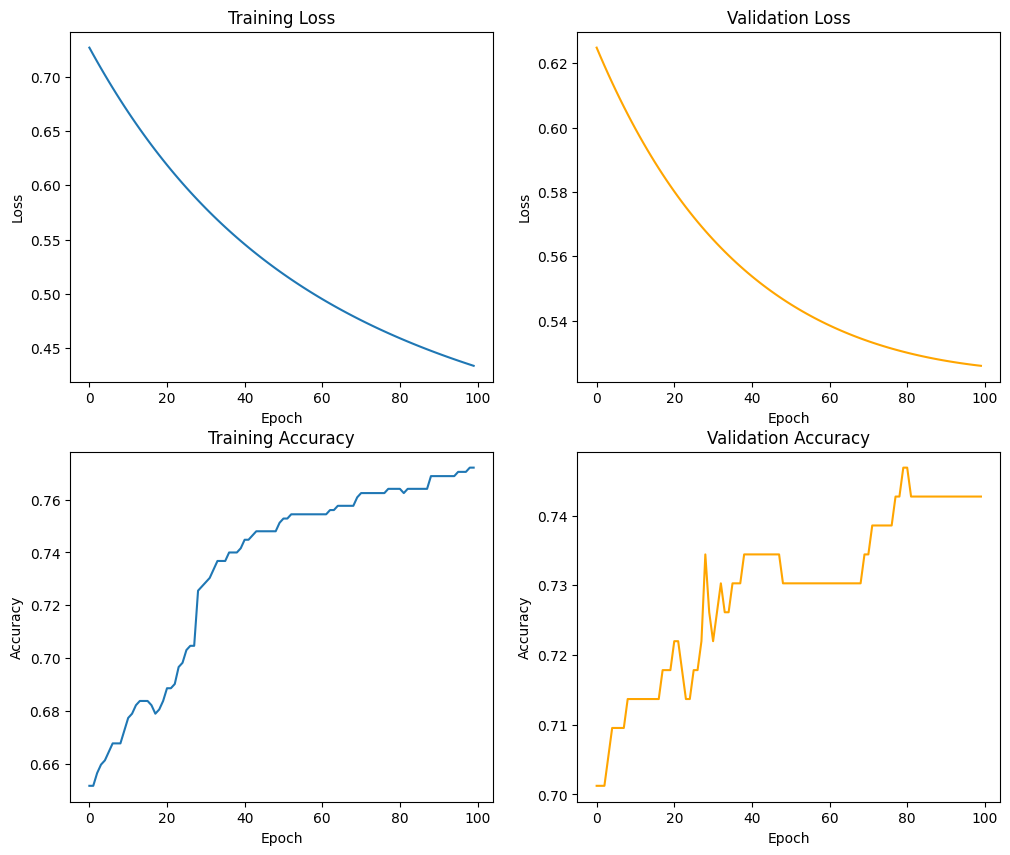

In [8]:
model = LogisticRegression()
model.train(X_train,y_train,X_val,y_val)

In [10]:
val_set_acc = model.compute_accracy(model.predict(X_val), y_val) 
test_set_acc = model.compute_accracy(model.predict(X_test) , y_test) 
print('Evaluation on validation and test set:') 
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.7427385892116183
Accuracy: 0.7777777777777778
